# LINEAR REGRESSION

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tabulate import tabulate

In [7]:
# report a table
def cal_MSE(Y_pred, Y_true):
    diff = Y_pred - Y_true
    abs_diff = np.square(diff)

    mean_squre_diff = np.average(abs_diff)
    return mean_squre_diff

def cal_MAE(Y_pred, Y_true):
    diff = Y_pred - Y_true
    abs_diff = np.absolute(diff)

    mean_abs_diff = np.average(abs_diff)
    return mean_abs_diff

def cal_R2(Y_pred, Y_true):
    r2_score_val = r2_score(Y_true, Y_pred)
    return r2_score_val

### Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [15]:
# To read data from diamonds.csv
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]

label_encoder = preprocessing.LabelEncoder()

data['cut']= label_encoder.fit_transform(data['cut'])
data['color']= label_encoder.fit_transform(data['color'])
data['clarity']= label_encoder.fit_transform(data['clarity'])

In [16]:
X, Y = separte_features_and_outputs(data, ['price','cut','color','clarity','depth','table'], normalize_type=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [17]:
def train_linear_regressor(X_train, Y_train, epoch=5000, alpha=0.01):

    Y_train = Y_train.reshape((-1,1))
    X_train = np.c_[X_train, np.ones(X_train.shape[0])]

    weight = np.ones(X_train.shape[1]).reshape((-1,1))

    for _ in tqdm(range(epoch)):
        prediction = np.matmul(X_train, weight)
        prediction = np.subtract(prediction, Y_train)
        
        prediction = np.matmul(X_train.transpose(), prediction)
        weight = weight - ((alpha/X_train.shape[0]) * prediction)  
            
    return weight

def test_linear_regressor(X_test, weights):
    X_test_new = np.c_[X_test, np.ones(X_test.shape[0])]

    prediction = np.matmul(X_test_new, weights)
    return prediction.reshape(-1)

In [18]:
weights = train_linear_regressor(X_train, Y_train)
Y_pred = test_linear_regressor(X_test, weights)

100%|██████████| 5000/5000 [00:00<00:00, 7731.32it/s]


In [19]:
headr = ['Error Fun', 'Error-value']
error = []

error.append(['MAE', cal_MAE(Y_pred, Y_test)])
error.append(['MSE', cal_MSE(Y_pred, Y_test)])
error.append(['R2', cal_R2(Y_pred, Y_test)])

print(tabulate(error, headers=headr, tablefmt="fancy_grid"))

╒═════════════╤═══════════════╕
│ Error Fun   │   Error-value │
╞═════════════╪═══════════════╡
│ MAE         │ 939.665       │
├─────────────┼───────────────┤
│ MSE         │   2.50156e+06 │
├─────────────┼───────────────┤
│ R2          │   0.846985    │
╘═════════════╧═══════════════╛


### What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [20]:
# To read data from diamonds.csv
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]

label_encoder = preprocessing.LabelEncoder()

data['cut']= label_encoder.fit_transform(data['cut'])
data['color']= label_encoder.fit_transform(data['color'])
data['clarity']= label_encoder.fit_transform(data['clarity'])

In [21]:
#code for Correlation between features and the Diamond Price.
from scipy.stats import pearsonr

header_list = ["carat","cut","color","clarity","depth","table","x","y","z"]
Y = data['price'].astype(np.float)

co_relation = []
for hdr in header_list:
    col_data = data[hdr].astype(np.float)

    co_rel, _ = pearsonr(col_data, Y)
    co_relation.append([hdr, 'Price', co_rel])
    
headr = ['Col-1', 'Col-2', 'Corelation']
print(tabulate(co_relation, headers=headr, tablefmt="fancy_grid"))

╒═════════╤═════════╤══════════════╕
│ Col-1   │ Col-2   │   Corelation │
╞═════════╪═════════╪══════════════╡
│ carat   │ Price   │    0.921591  │
├─────────┼─────────┼──────────────┤
│ cut     │ Price   │    0.0398603 │
├─────────┼─────────┼──────────────┤
│ color   │ Price   │    0.172511  │
├─────────┼─────────┼──────────────┤
│ clarity │ Price   │   -0.071535  │
├─────────┼─────────┼──────────────┤
│ depth   │ Price   │   -0.0106474 │
├─────────┼─────────┼──────────────┤
│ table   │ Price   │    0.127134  │
├─────────┼─────────┼──────────────┤
│ x       │ Price   │    0.884435  │
├─────────┼─────────┼──────────────┤
│ y       │ Price   │    0.865421  │
├─────────┼─────────┼──────────────┤
│ z       │ Price   │    0.861249  │
╘═════════╧═════════╧══════════════╛


### Explanation

- Correlation simply means a mutual relationship between two or more things

- When we have highly correlated features in the dataset
    - The diagonal matrix got from Singular Value Decomposition is too small
    - And in regression we need to inverse that diagonal matrix(let's say D)
    - The inverse of D leads to very large number computation
    - cause determinat of D is very high value
    
- That is why highly correlated features in the dataset is not used

### Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [22]:
# import sklearn model

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

Y_pred = linreg.predict(X_test)

headr = ['Error Fun', 'Error-value']
sk_error = []

sk_error.append(['MAE', cal_MAE(Y_pred, Y_test)])
sk_error.append(['MSE', cal_MSE(Y_pred, Y_test)])
sk_error.append(['R2', cal_R2(Y_pred, Y_test)])

print("scikit-learn KNN Regressor results")
print(tabulate(sk_error, headers=headr, tablefmt="fancy_grid"))

print("\n\nMy KNN Regressor results")
print(tabulate(error, headers=headr, tablefmt="fancy_grid"))

scikit-learn KNN Regressor results
╒═════════════╤═══════════════╕
│ Error Fun   │   Error-value │
╞═════════════╪═══════════════╡
│ MAE         │ 926.776       │
├─────────────┼───────────────┤
│ MSE         │   2.50141e+06 │
├─────────────┼───────────────┤
│ R2          │   0.846995    │
╘═════════════╧═══════════════╛


My KNN Regressor results
╒═════════════╤═══════════════╕
│ Error Fun   │   Error-value │
╞═════════════╪═══════════════╡
│ MAE         │ 939.665       │
├─────────────┼───────────────┤
│ MSE         │   2.50156e+06 │
├─────────────┼───────────────┤
│ R2          │   0.846985    │
╘═════════════╧═══════════════╛


### Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [23]:
# To read data from diamonds.csv
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]

label_encoder = preprocessing.LabelEncoder()

data['cut']= label_encoder.fit_transform(data['cut'])
data['color']= label_encoder.fit_transform(data['color'])
data['clarity']= label_encoder.fit_transform(data['clarity'])

In [24]:
X, Y = separte_features_and_outputs(data, ['price'], normalize_type=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [25]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

Y_pred = linreg.predict(X_test)

headr = ['Error Fun', 'Error-value']
new_sk_error = []

new_sk_error.append(['MAE', cal_MAE(Y_pred, Y_test)])
new_sk_error.append(['MSE', cal_MSE(Y_pred, Y_test)])
new_sk_error.append(['R2', cal_R2(Y_pred, Y_test)])

print("Whole dataset scikit-learn KNN Regressor results")
print(tabulate(new_sk_error, headers=headr, tablefmt="fancy_grid"))

print("\n\nscikit-learn KNN Regressor results")
print(tabulate(sk_error, headers=headr, tablefmt="fancy_grid"))

Whole dataset scikit-learn KNN Regressor results
╒═════════════╤═══════════════╕
│ Error Fun   │   Error-value │
╞═════════════╪═══════════════╡
│ MAE         │ 866.051       │
├─────────────┼───────────────┤
│ MSE         │   1.89813e+06 │
├─────────────┼───────────────┤
│ R2          │   0.880659    │
╘═════════════╧═══════════════╛


scikit-learn KNN Regressor results
╒═════════════╤═══════════════╕
│ Error Fun   │   Error-value │
╞═════════════╪═══════════════╡
│ MAE         │ 926.776       │
├─────────────┼───────────────┤
│ MSE         │   2.50141e+06 │
├─────────────┼───────────────┤
│ R2          │   0.846995    │
╘═════════════╧═══════════════╛


- Adding extra features did it make the prediction better or worse.
    - In this case : Better
    
    - Comments:
        - R2 score
            - Before: Low
            - After: Incresed
            
        - MAE
            - Before: High
            - After: decresed
           
        - Changes
            - Before: dropes features: ['price','cut','color','clarity','depth','table']
            - After: All features is used

### Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


- KNN is a non -parametric model, whereas LR is a parametric model
- KNN is slow while LR is fast when training completes

- Which shold be prefered 
- For larger Dataset
    - LR is better 
        - only one time training is need
    - KNN
        - Every time it will compute all distances
- need of non-linear solutions
    - KNN supports non-linear solutions where LR supports only linear solutions.

### Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


In [26]:
# To read data from diamonds.csv
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]

label_encoder = preprocessing.LabelEncoder()

data['cut']= label_encoder.fit_transform(data['cut'])
data['color']= label_encoder.fit_transform(data['color'])
data['clarity']= label_encoder.fit_transform(data['clarity'])

In [27]:
X, Y = separte_features_and_outputs(data, ['price','cut','color','clarity','depth','table'], normalize_type=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [28]:
#plot 
Y_pred_knn_regressor = knn_regressor_euclidean_dis(5, X_train, Y_train, X_test)

weights = train_linear_regressor(X_train, Y_train)
Y_pred_linear_regressor = test_linear_regressor(X_test, weights)

100%|██████████| 5000/5000 [00:00<00:00, 6976.31it/s]


Text(0.5, 0, 'Price')

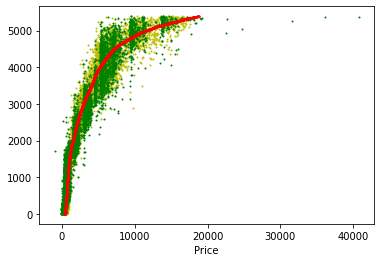

In [30]:
idx = np.argsort(Y_test)
inc_list = list(range(len(Y_test)))

Y_test_new = []
Y_pred_knn_regressor_new = []
Y_pred_linear_regressor_new = []

for i in idx:    
    Y_test_new.append(Y_test[i])
    Y_pred_knn_regressor_new.append(Y_pred_knn_regressor[i])
    Y_pred_linear_regressor_new.append(Y_pred_linear_regressor[i])
    
plt.plot(Y_pred_knn_regressor_new, inc_list, 'yo', markersize=1)
plt.plot(Y_pred_linear_regressor_new, inc_list, 'go', markersize=1)
plt.plot(Y_test_new, inc_list, 'ro', markersize=1)

plt.xlabel('Price') 